In [ ]:
from google.colab import files
import pandas as pd

# Upload a file to colab
uploaded = files.upload()
# Get the name of the file
key = list(uploaded.keys())[0]

import io
# Read that file using pandas library
xls = pd.read_excel(io.BytesIO(uploaded[key]), sheet_name=None)

Saving Stock Data.xlsx to Stock Data.xlsx


In [ ]:
# Get the sheet 'GOOGL' from the excel file
df = xls['GOOGL']

In [ ]:
# Get the maximum values for each column. This will be used to normalize the data
maxVals = {}
for col in df.columns:
  if col != 'Date':
    maxVals[col] = max(df[col]) * 2
print(maxVals)

{'Open': 3099.879882, 'High': 3152.71997, 'Low': 3041.95996, 'Close': 3078.02002, 'Adj Close': 3078.02002, 'Volume': 59239800}


In [ ]:
# Normalize the data so that all values are between 0 and 1
for col in df.columns:
  if col != 'Date':
    df[col] /= maxVals[col]

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.075743,0.074702,0.075606,0.074735,0.074735,0.263909
1,2010-07-19,0.074434,0.074558,0.075277,0.075803,0.075803,0.153468
2,2010-07-20,0.074437,0.076676,0.075784,0.078309,0.078309,0.136746
3,2010-07-21,0.078146,0.077106,0.078224,0.077644,0.077644,0.110611
4,2010-07-22,0.078021,0.077627,0.079384,0.078832,0.078832,0.072436
...,...,...,...,...,...,...,...
2512,2020-07-09,0.487093,0.485022,0.491653,0.493389,0.493389,0.035311
2513,2020-07-10,0.488164,0.488892,0.493340,0.500000,0.500000,0.030316
2514,2020-07-13,0.500000,0.500000,0.495260,0.491300,0.491300,0.036254
2515,2020-07-14,0.481564,0.483012,0.488478,0.494103,0.494103,0.032164


In [ ]:
# The Y value to predict will be the Adjusted close price
Y = df['Adj Close'].values
# The input values will be all the values of the previous few days
X = df.drop(['Date'], 1).values

# The amount of previous days to use for prediction
TIME = 7 

# Preparing data for sliding window
# With sliding window, we include the values of the previous 7 days
# So each input to our neural network is an array of inputs 

# We drop the first 7 days of data
series_y = Y[TIME:]

# For each day, we add the inputs of the previous 7 days
series_x = [X[x:x+TIME] for x in range(0,len(X)-TIME)]

In [ ]:
import tensorflow.keras.backend as K

def accuracy(y_true, y_pred):
  return K.mean( 1 - K.abs((K.abs(y_true) - K.abs(y_pred)))/K.abs(y_true)  )

In [ ]:
import tensorflow as tf

# Define and compile the LSTM model with optimzer adam and MSE loss function

d = 0.2
model = tf.keras.Sequential() # Start with a sequential model
model.add(tf.keras.layers.LSTM(32, input_shape=(TIME, 6), return_sequences=True)) # Add an LSTML layer
model.add(tf.keras.layers.Dropout(d)) # Add a dropout layer
model.add(tf.keras.layers.LSTM(16, return_sequences=False)) # Add an LSTML layer
model.add(tf.keras.layers.Dropout(d)) # Add a dropout layer
model.add(tf.keras.layers.Dense(4)) # Add a dense layer
model.add(tf.keras.layers.LeakyReLU(alpha=0.3)) # Add a Leaky Rectified Linear Unit layer
model.add(tf.keras.layers.Dense(1)) # Add a dense layer
model.add(tf.keras.layers.LeakyReLU(alpha=0.3)) # Add a Leaky Rectified Linear Unit layer
model.summary() # Print a summary of the model
# Compile with adam optimizer and MSE loss function
model.compile(optimizer='adam',loss='mean_squared_error', metrics=[accuracy]) 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 7, 32)             4992      
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 32)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dropout_23 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 68        
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 4)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

In [ ]:
import tensorflow as tf

# Define and compile the CNN-LSTM Hybrid model with optimzer adam and MSE loss function

d = 0.2
cnnmodel = tf.keras.Sequential() # Start with a sequential model
cnnmodel.add(tf.keras.layers.Conv1D(activation='relu',filters=6, kernel_size=6, input_shape=(TIME, 6)))  # Add a 1D convolution layer
cnnmodel.add(tf.keras.layers.MaxPooling1D(pool_size=2)) # Add a max pooling layer
cnnmodel.add(tf.keras.layers.LSTM(32, return_sequences=True)) # Add an LSTML layer
cnnmodel.add(tf.keras.layers.Dropout(d)) # Add a dropout layer
cnnmodel.add(tf.keras.layers.LSTM(16, return_sequences=False)) # Add an LSTML layer
cnnmodel.add(tf.keras.layers.Dropout(d)) # Add a dropout layer
cnnmodel.add(tf.keras.layers.Dense(4)) # Add a dense layer
cnnmodel.add(tf.keras.layers.LeakyReLU(alpha=0.3)) # Add a Leaky Rectified Linear Unit layer
cnnmodel.add(tf.keras.layers.Dense(1)) # Add a dense layer
cnnmodel.add(tf.keras.layers.LeakyReLU(alpha=0.3)) # Add a Leaky Rectified Linear Unit layer
cnnmodel.summary() # Print a summary of the model
# Compile with adam optimizer and MSE loss function
cnnmodel.compile(optimizer='adam',loss='mean_squared_error', metrics =[accuracy])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2, 6)              222       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 6)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             4992      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                

In [ ]:
import numpy as np

# Spliting data into train and test data with 90% data for training and 10% for testing
n = len(series_x)
# This defines the ratio of train to test data
split = 0.9
# Use the first 90% as train input
train_x = np.array(series_x[:int(n*split)])
# Use the first 90% as test input
test_x = np.array(series_x[int(n*split):])
# Use the last 10% as train output
train_y = np.array(series_y[:int(n*split)])
# Use the last 10% as test output
test_y = np.array(series_y[int(n*split):])


In [ ]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(2259, 7, 6) (2259,)
(251, 7, 6) (251,)


In [ ]:
# Train the LSTM model for 100 epochs
history = model.fit(train_x, train_y, epochs=100, validation_data=(test_x, test_y))

Epoch 1/100
71/71 [==============================] - 1s 15ms/step - loss: 0.0081 - accuracy: 0.6618 - val_loss: 6.6303e-04 - val_accuracy: 0.9453
Epoch 2/100
71/71 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.8791 - val_loss: 1.9309e-04 - val_accuracy: 0.9769
Epoch 3/100
71/71 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 0.8954 - val_loss: 5.1702e-04 - val_accuracy: 0.9525
Epoch 4/100
71/71 [==============================] - 0s 6ms/step - loss: 8.5636e-04 - accuracy: 0.9039 - val_loss: 8.2075e-04 - val_accuracy: 0.9380
Epoch 5/100
71/71 [==============================] - 0s 7ms/step - loss: 6.7956e-04 - accuracy: 0.9143 - val_loss: 5.2793e-04 - val_accuracy: 0.9521
Epoch 6/100
71/71 [==============================] - 0s 7ms/step - loss: 5.2698e-04 - accuracy: 0.9250 - val_loss: 4.0119e-04 - val_accuracy: 0.9595
Epoch 7/100
71/71 [==============================] - 0s 7ms/step - loss: 4.8398e-04 - accuracy: 0.9288 - val_loss: 9.

[0.943728506565094, 0.9452704787254333, 0.9461615085601807, 0.94530189037323, 0.9485409259796143, 0.9457006454467773, 0.9458473920822144, 0.9458644986152649, 0.9471798539161682, 0.9456391930580139, 0.9451906681060791, 0.9485213756561279, 0.9457910060882568, 0.9475277066230774, 0.9463927745819092, 0.9454118013381958, 0.9474818110466003, 0.9475995898246765, 0.9464765787124634, 0.9486476182937622, 0.9476590156555176, 0.9482787251472473, 0.9478869438171387, 0.9479532241821289, 0.9477730393409729, 0.9470020532608032, 0.9493640065193176, 0.9491810202598572, 0.948240339756012, 0.947738528251648, 0.9508606791496277, 0.9492064714431763, 0.9497469067573547, 0.9497060775756836, 0.9485563039779663, 0.9486650228500366, 0.9499966502189636, 0.9504017233848572, 0.9513287544250488, 0.9488207101821899, 0.9505866765975952, 0.9506652355194092, 0.9528464674949646, 0.9508652091026306, 0.950773298740387, 0.9493982195854187, 0.9514288306236267, 0.9518479704856873, 0.9530915021896362, 0.9512103199958801, 0.952

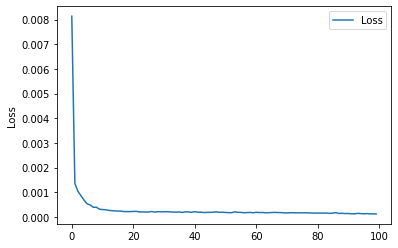

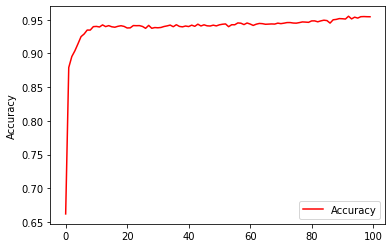

In [ ]:
# Displaying the loss graph

import matplotlib.pyplot as plt
# Plot the Loss values
plt.plot(history.history['loss'])
# Label the Y value as Loss
plt.ylabel('Loss')
# Label the graph as Loss
plt.legend(['Loss'])
plt.show()

# Displaying the Accuracy graph

import matplotlib.pyplot as plt
# Plot the accuracy values
plt.plot(history.history['accuracy'], color='r')
# Label the Y value as accuracy
plt.ylabel('Accuracy')
# Label the graph as accuracy
plt.legend(['Accuracy'])
plt.show()

In [ ]:
test_loss = model.evaluate(test_x, test_y)
print("Test Loss for LSTM:\t", test_loss)

8/8 [==============================] - 0s 2ms/step - loss: 6.2615e-04
Test Loss for LSTM:	 0.0006261529051698744


(2510,)


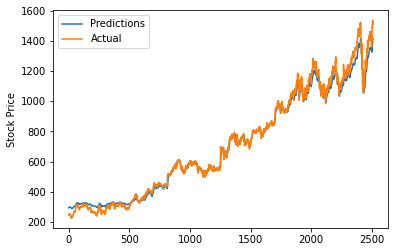

In [ ]:
# Get predictions from the trained hybrid model
predictions = model.predict(np.array(series_x))

# Multiply the predictions by the max value to get the original value since these are normalized
predictions = predictions.flatten()*maxVals['Adj Close']

# Get the actual values
actual = series_y*maxVals['Adj Close']

print(predictions.shape)

# Plot the two graphs

import matplotlib.pyplot as plt
# Plot the predictions
plt.plot(predictions)
# Plot the actual values
plt.plot(actual)
# Label the Y axis as Stock Price
plt.ylabel('Stock Price')
# Label the plots as predictions and actual
plt.legend(['Predictions', 'Actual'])
plt.show()

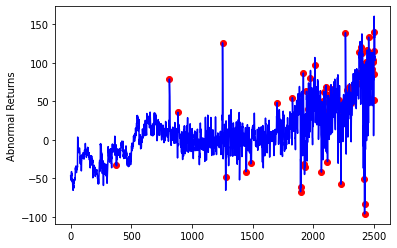

Max Difference:	 160.46374470312503
Min Difference:	 0.02832042968748283
Avg Difference:	 24.908797621785492


In [ ]:
# Calculating the abnormal returns for each prediction
diff = np.array([actual[i]-predictions[i] for i in range(len(predictions))])

abnormalities_x = []
abnormalities_y = []

# Set a threshold for abnornality
thres = sum(abs(diff))/len(diff)

# Iterate over all the differences
for i in range(1,len(diff)):
  # If difference is greater than threshold, add it to the abnormalities array to be plotted later
  if abs(diff[i]) - abs(diff[i-1]) > thres:
    abnormalities_x.append(i)
    abnormalities_y.append(diff[i])

# Plot all the differences
plt.plot(diff, color='b')
# Mark the abnormalities in red
plt.scatter(abnormalities_x, abnormalities_y, color='r')
plt.ylabel('Abnormal Returns')
plt.show()

# Print the maximum difference in prediction and actual
print('Max Difference:\t', max(abs(diff)))
# Print the minimum difference in prediction and actual
print('Min Difference:\t', min(abs(diff)))
# Print the average difference in prediction and actual
print('Avg Difference:\t', sum(abs(diff))/len(diff))

In [ ]:
# Train the CNN-LSTM Hybrid model for 100 epochs

cnnhistory = cnnmodel.fit(train_x, train_y, epochs=100, validation_data=(test_x, test_y))

Epoch 1/100
71/71 [==============================] - 1s 12ms/step - loss: 0.0179 - accuracy: 0.4655 - val_loss: 0.0216 - val_accuracy: 0.6633
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.7250 - val_loss: 4.0504e-04 - val_accuracy: 0.9588
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.8978 - val_loss: 2.1685e-04 - val_accuracy: 0.9763
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 8.9286e-04 - accuracy: 0.9038 - val_loss: 3.5838e-04 - val_accuracy: 0.9637
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 6.5262e-04 - accuracy: 0.9119 - val_loss: 3.6514e-04 - val_accuracy: 0.9632
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 6.0933e-04 - accuracy: 0.9150 - val_loss: 2.1001e-04 - val_accuracy: 0.9763
Epoch 7/100
71/71 [==============================] - 0s 3ms/step - loss: 5.1951e-04 - accuracy: 0.9200 - val_loss: 2.0339

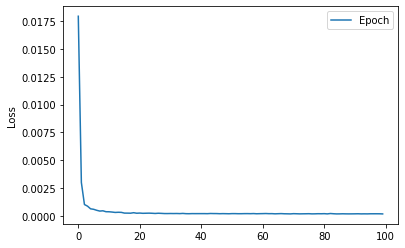

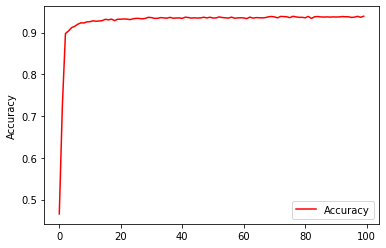

In [ ]:
# Displaying the loss graph

import matplotlib.pyplot as plt
# Plot the Loss values
plt.plot(cnnhistory.history['loss'])
# Label the Y value as Loss
plt.ylabel('Loss')
# Label the graph as Loss
plt.legend(['Loss'])
plt.show()

# Displaying the Accuracy graph

import matplotlib.pyplot as plt
# Plot the accuracy values
plt.plot(cnnhistory.history['accuracy'], color='r')
# Label the Y value as accuracy
plt.ylabel('Accuracy')
# Label the graph as accuracy
plt.legend(['Accuracy'])
plt.show()

In [ ]:
test_loss = cnnmodel.evaluate(test_x, test_y)
print("Test Loss for CNN-LSTM:\t", test_loss)

8/8 [==============================] - 0s 2ms/step - loss: 6.2628e-04
Test Loss for CNN-LSTM:	 0.0006262849201448262


(2510,)


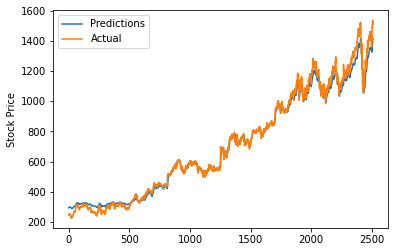

In [ ]:
# Get predictions from the trained hybrid model
predictions = cnnmodel.predict(np.array(series_x))

# Multiply the predictions by the max value to get the original value since these are normalized
predictions = predictions.flatten()*maxVals['Adj Close']

# Get the actual values
actual = series_y*maxVals['Adj Close']

print(predictions.shape)

# Plot the two graphs

import matplotlib.pyplot as plt
# Plot the predictions
plt.plot(predictions)
# Plot the actual values
plt.plot(actual)
# Label the Y axis as Stock Price
plt.ylabel('Stock Price')
# Label the plots as predictions and actual
plt.legend(['Predictions', 'Actual'])
plt.show()

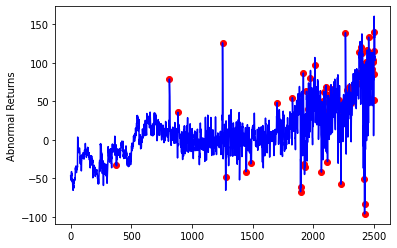

Max Difference:	 160.46374470312503
Min Difference:	 0.02832042968748283
Avg Difference:	 24.908797621785492


In [ ]:
# Calculating the abnormal returns for each prediction
diff = np.array([actual[i]-predictions[i] for i in range(len(predictions))])

abnormalities_x = []
abnormalities_y = []

# Set a threshold for abnornality
thres = sum(abs(diff))/len(diff)

# Iterate over all the differences
for i in range(1,len(diff)):
  # If difference is greater than threshold, add it to the abnormalities array to be plotted later
  if abs(diff[i]) - abs(diff[i-1]) > thres:
    abnormalities_x.append(i)
    abnormalities_y.append(diff[i])

# Plot all the differences
plt.plot(diff, color='b')
# Mark the abnormalities in red
plt.scatter(abnormalities_x, abnormalities_y, color='r')
plt.ylabel('Abnormal Returns')
plt.show()

# Print the maximum difference in prediction and actual
print('Max Difference:\t', max(abs(diff)))
# Print the minimum difference in prediction and actual
print('Min Difference:\t', min(abs(diff)))
# Print the average difference in prediction and actual
print('Avg Difference:\t', sum(abs(diff))/len(diff))